# LGBIO2072 - Mathematical models in Neuroscience
# Chapter 3 - Dynamical networks and decision making 

**Authors** : Florence Blondiaux & Antoine de Comite


**Professor** : Frederic Crevecoeur



**Imports and graph settings**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

## Introduction

In the previous sessions, we saw that the communication between neurons is performed through the temporal pattern of the spiking train they transfer to their neighbours. However, when humans or animals perform a complex task such as choosing between a chocolate or a vanilla ice cream, more than one neuron is involved. In this session, we will study a model of neuronal population dynamics represented by a system of differential equations.

At the end of this session you should be able to

* Explain with your own words the different terms in the system of equations

* Explain the notion of activation function

* Model and understand the population' dynamics for the two excitatory populations

* Investigate the fixed points

* Model and understand the winner takes all model


## Competition through common inhibition

In this first section, we will consider a system characterised by two different populations, left and right, that can decide for different outcome of a binary decision. These two populations are inhibited by an inhibitory population (the lower population on the figure).

The dynamic of the three populations present in this system can be described by equations 1 to 3.
\begin{eqnarray}
& & \\
\tau _E \frac{dh_{E,1}}{dt} & = & -h_{E,1} + w_{EE}g_E(h_{E,1}) +  w_{EI}g_{inh}(h_{inh}) + RI_1 \tag{1}\\
\tau _E \frac{dh_{E,2}}{dt} & = & -h_{E,2} + w_{EE}g_E(h_{E,2}) +  w_{EI}g_{inh}(h_{inh}) + RI_2 \tag{2} \\
\tau _{inh} \frac{dh_{inh}}{dt} & = & -h_{inh} + w_{IE}g_E(h_{E,1}) +  w_{IE}g_{E}(h_{E,2}) \tag{3}\\
& &
\end{eqnarray}
The first two equations represent the two excitatory populations $h_{E,1}$ and $h_{E_2}$ while the parameters $\tau_E$ and $\tau_{inh}$ are the time constants for the excitatory and inhibitory processes respectively. The terms $h_{E,1}$, $h_{E,2}$ and $h_{inh}$ are proxies of the different populations' potentials(respectively the two excitatory populations and the inhibitory one). The parameters $w_{EE}$, $w_{EI}$ and $w_{IE}$ are factors that characterise the strength of the excitatory and inhibitory interactions. You can observe that the different population potentials are passed as an argument of functions $g_E$ and $g_{inh}$. These functions are called activation functions, we will investigate them later on. 

This model can be simplified into a 2-dimensional model that does not involve the inhibitory population anymore (see book for detailed developments **or you can try to do it yourself as a bonus**).

\begin{eqnarray}
& &\\
\tau _E \frac{dh_{E,1}}{dt} & = &  -h_{E,1} + (w_{EE}-\alpha)g_E(h_{E,1}) - \alpha g_E(h_{E,2}) + RI_1 \tag{4}\\
\tau _E \frac{dh_{E,2}}{dt} & =&  -h_{E,2} + (w_{EE}-\alpha)g_E(h_{E,2}) - \alpha g_E(h_{E,1}) + RI_2 \tag{5}\\
& & 
\end{eqnarray}

with $\alpha = - \gamma w_{EI} w_{IE}$ where $\gamma$ is the slope of the gain function of the inhibitory neurons (see the definition of activation functions). And with the activation function :  $g = (1 + tanh(h-\theta)) A_{max} / 2$ (see [book](https://neuronaldynamics.epfl.ch/online/Ch16.S3.html) for more details).

<img alt='Solution hint' align='center' width=413 height=300 src=https://neuronaldynamics.epfl.ch/online/x519.png>



## Implementation the activation function

In the differential equations systems we saw above, we defined an activation function that was applied to the population's potentials. In this first exercice, you will be implementing this activation function and investigating how its parameters influence its shape. 


**Exercise 1**

Implement the activation whose definition is given above by filling the following blanks in the code.

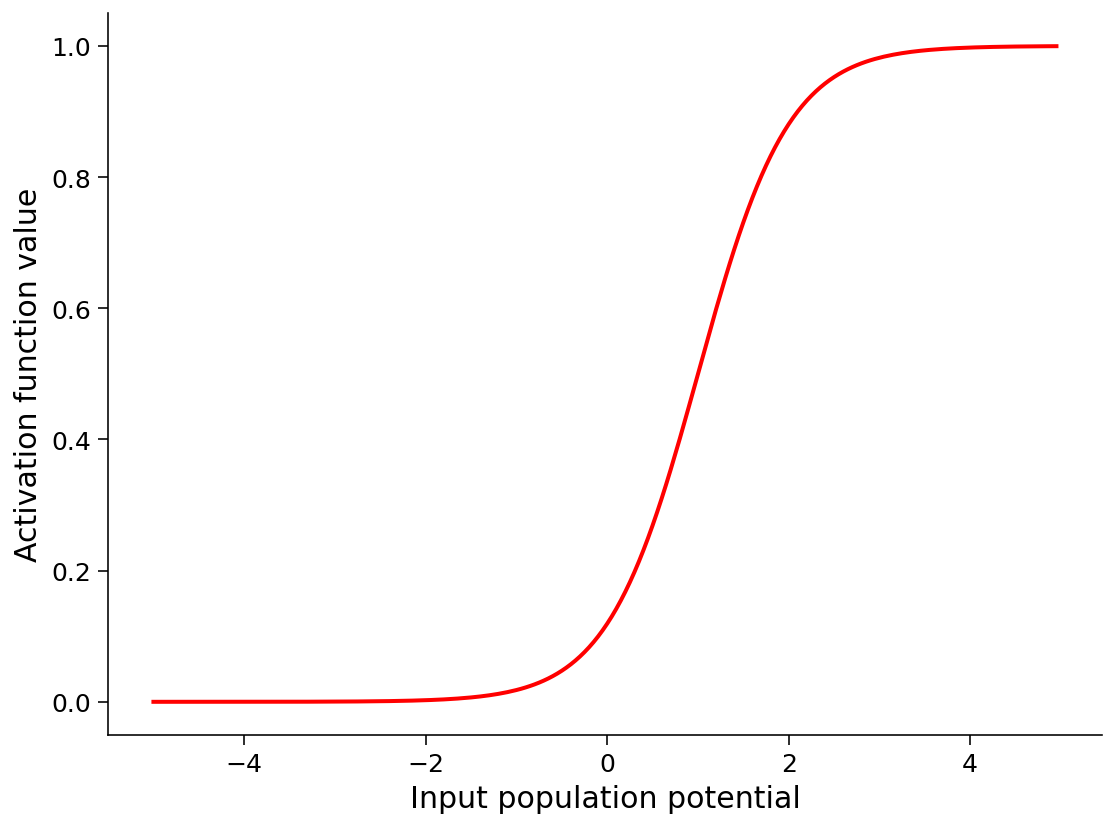

In [3]:
def geval(hi,theta=1,Amax=1):
  """
  Computes the values of the activations functions for all neuronal population given their respective potentials

  Inputs : 
    hi is a vector containing the potential of the populations
    theta is the threshold parameter
    Amax is the gain parameter 

  Outputs : 
    feval is the value of the activation functions
  """
  feval = (1+np.tanh(hi-theta))*Amax/2
  ######################
  ### your code here ###
  ######################

  return feval


#Run the lines below to test your code 

hi_input = np.arange(-5,5,0.05)
feval = geval(hi_input)

fig, ax = plt.subplots()
ax.plot(hi_input,feval,color='red',linewidth=2)
ax.set_xlabel("Input population potential")
ax.set_ylabel("Activation function value")
plt.show()

**Use the widget below to investigate the effect of the gain and threshold on this activation function**

In [4]:
# @title Run this cell to execute the widget
my_layout.width="450pt"
@widgets.interact(
    theta=widgets.FloatSlider(0,min=-4,max=4,step=0.2,layout=my_layout),
    Amax=widgets.FloatSlider(2.5,min=0,max=5,step=0.25,layout=my_layout),
)

def investigate_acti(theta=0,Amax=2.5):
  h_span = np.arange(-5,5,0.05)
  feval = geval(h_span,theta,Amax)

  fig,ax = plt.subplots()
  ax.plot(h_span,feval,color="red",linewidth=2)
  ax.set_xlabel("Input population potential")
  ax.set_ylabel("Activation function")
  plt.xlim([-5, 5])
  plt.ylim([0,5])


interactive(children=(FloatSlider(value=0.0, description='theta', layout=Layout(width='450pt'), max=4.0, min=-…

**Questions**

* Why do you think we need to use this activation function? 

* What are the roles of the threshold and amplitude parameters (mathematically & physiologically)

## Modelling of the system
Now that we understand all the terms of the equations, it is time to model their evolution. To do so, we need to discretize the system and to get rid of the differential equations. You can use [Euler methods](https://en.wikipedia.org/wiki/Euler_method) or other numerical integration methods to discretize the system.

**Exercise 2**

Once you obtain your discretized system, use the following parameters to implement its evolution.

 
| Parameter | Value |
|-----------|-------|
| $\alpha$  | 1     |
| $w_{EE}$  | 1.5   |
| $RI_1$    | 0.8   |
| $RI_2$    | 0.75  |

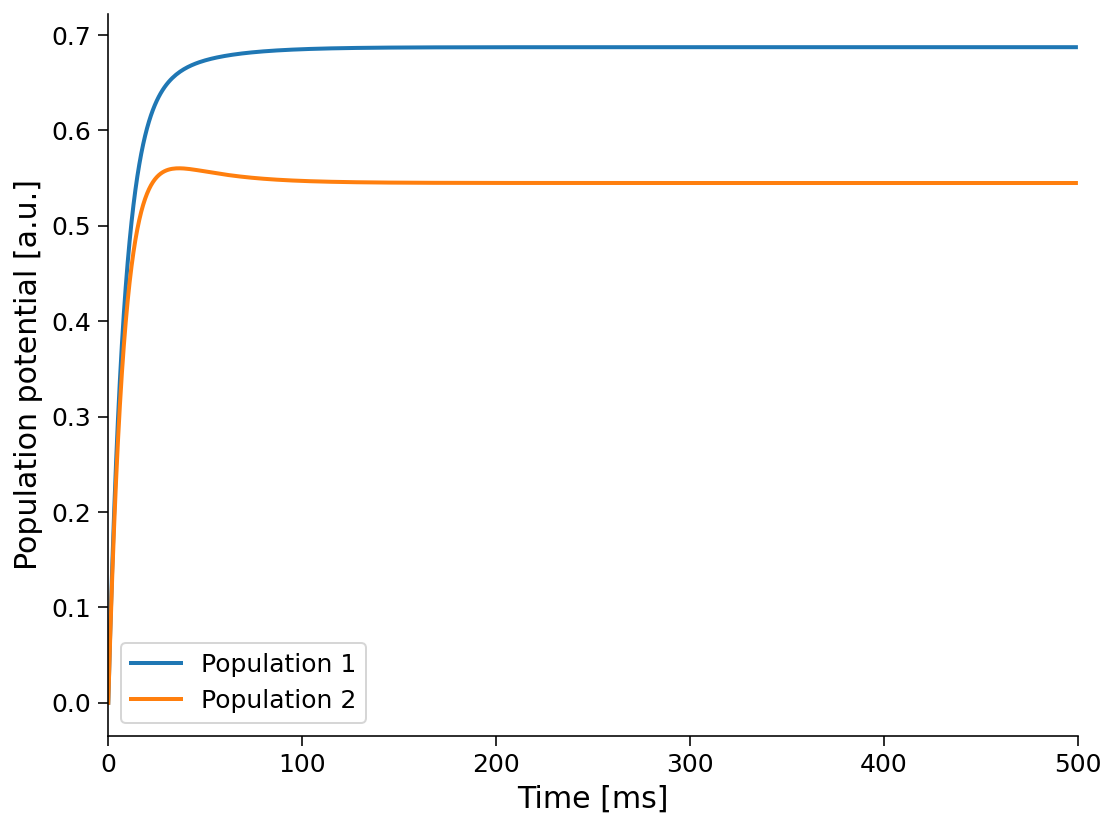

In [25]:
def simulatePopEv(RI, h0,pars):
    """
    This function models the temporal evolution of the system characterized by two excitatory populations inhibited by the same inhibiting population

    Inputs : 
    -RI (numpy array) contains the time-evolution of the input currents (each row contains an input current)
    -h0 (numpy array) contains the initial values of the populations' potentials
    -pars is a dictionnary that contains the following task parameters
      sim_time : the simulation time
      dt : the time step
      tau : the system's time constant
      wee : the self-excitatory parameter
      alpha : the inhibition parameter

    Outputs :
    -h (numpy array) contains the time evolution of the two populations' potentials

    """
    sim_time = pars['sim_time']
    dt = pars['dt']
    tau = pars['tau']
    wee = pars['wee']
    alpha = pars['alpha']
    theta = pars['theta']
    amax = pars['amax']
    h = np.zeros((2,int(sim_time/dt)))
    h[:,0] = h0 
    for i in range(int(sim_time/dt)-1):
      h[0,i+1] = (1-dt/tau)*h[0,i] + (wee-alpha)*dt/tau * geval(h[0,i]) - alpha*dt/tau * geval(h[1,i])+ dt/tau * RI[0,i]
      h[1,i+1] = (1-dt/tau)*h[1,i] + (wee-alpha)*dt/tau * geval(h[1,i]) - alpha*dt/tau * geval(h[0,i])+ dt/tau * RI[1,i]

    return h

#Run the lines below to test your code 

pars = {'sim_time':0.5,'dt':1e-3,'tau':10e-3,'wee':1.5,'alpha':1,'theta':1,'amax': 1}
RI = np.vstack((0.8*np.ones(500),0.75*np.ones(500)))
h0 = np.zeros(2)
h = simulatePopEv(RI,h0,pars)

fig, ax = plt.subplots()
ax.plot(h[0,:],label='Population 1',linewidth=2)
ax.plot(h[1,:],label='Population 2',linewidth=2)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Population potential [a.u.]')
plt.legend()
#plt.ylim([0, 1])
plt.xlim([0,500])

plt.show()


**Answer the following questions before going further**

* What does that graph represent? What are the two lines you observe?

* Why is there a plateau after some time? What does it physiologically correspond to? 

* How could you change the 'speed' at which this plateau is reached?


## Phase plane analysis

Some better tools are available for the representation of the time-evolution of the population dynamics. One of these is the so-called *phase plane analysis*. In this representation, the dynamics of the system is represented using vector fields and trajectories. 

Go through the function below to understand what the phase plane analysis is and what it does represent. There are some questions after the code cell to verify that you understood properly.

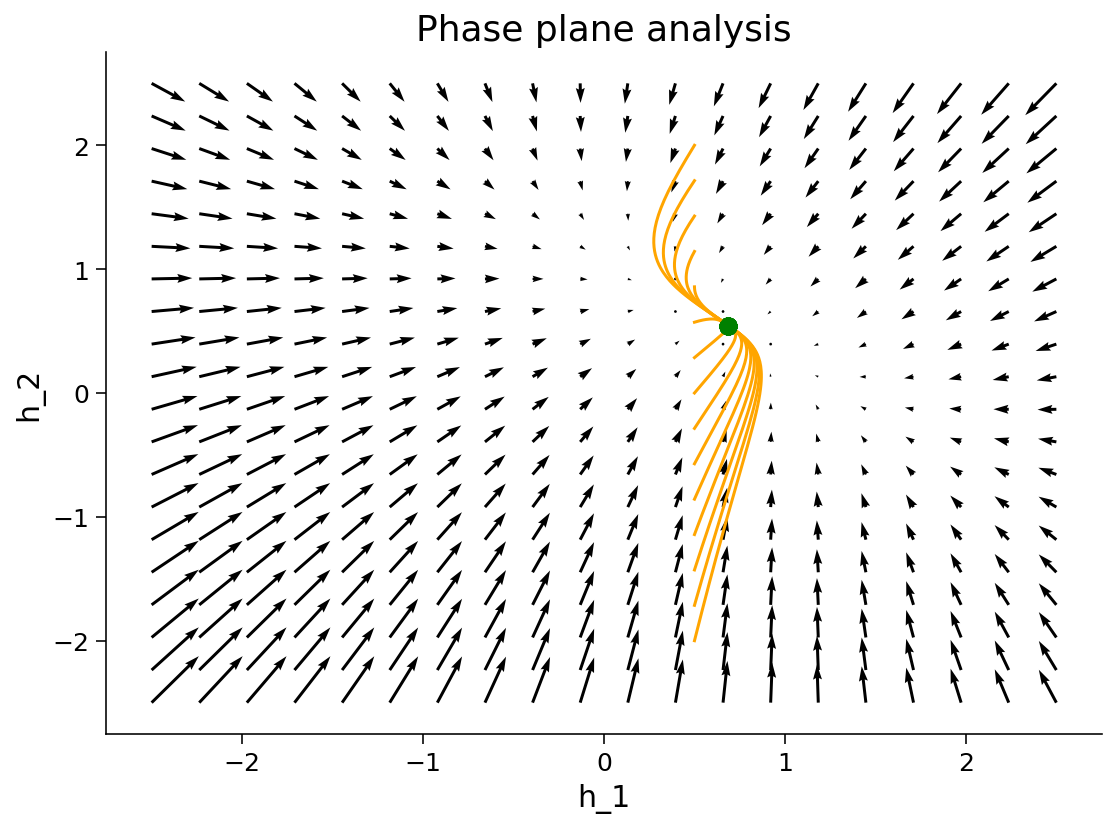

In [12]:
def PhasePlaneAnalysis(RI,h0init,pars):
    """
    Authors : Antoine de Comite and Florence Blondiaux
    PhasePlaneAnalysis is a function that allows to perform phase plane
    analysis
      The aim of this function is to investigate the stability of the model
      of the three populations in decision making. It has no outputs but
      represents a graph containing different pieces of information.
      ---> A vector field showing the evolution of the ODE system, the
      different vectors show toward which direction the solution is moving at any
      point of the meshgrid.
      ---> The trajectories of the solutions you've selected (starting from
      circle toward square)

    INPUTS :
    -RI (numpy array) contains the value of the input evidences for choice 1 and 2 rowwise
    -h0_init (numpy_array) contains the candidates for the initial position of the trajectories

    OUTPUTS :
    - No outputs
    
    What can be modified without too much damages in this code?
    -The parameters of section 0 if you want to have a global overview of
    their influence
    - The meshgrid itself (linspaces y1 and y2, but keep the name)
    """
  
    #Phase plane analysis implementation

    y1= np.linspace(-2.5,2.5,20)
    y2 = np.linspace(-2.5,2.5,20)

    [x,y] = np.meshgrid(y1,y2)
    u= np.zeros_like(x)
    v= np.zeros_like(y)
    pars['sim_time'] = 2e-3

    for i in range(len(x)):
        for j in range(len(x)):
            Hprime = simulatePopEv(RI[:,:2],[x[i,j],y[i,j]],pars)
            u[i,j]= Hprime[0,1]
            v[i,j]= Hprime[1,1]
    ax = plt.plot()
    plt.quiver(x,y,u-x,v-y,units='width') 

    pars['sim_time'] = .5
    for ii in range(h0init.shape[1]):
        h = simulatePopEv(RI,h0init[:,ii],pars)
        plt.plot(h[0,:],h[1,:],color="orange")
        plt.plot(h[0,-1],h[1,-1],color="green",marker='o',markersize=8)
    plt.title("Phase plane analysis")
    plt.xlabel('h_1')
    plt.ylabel('h_2')


#These lines call the function above and perform phase plane analysis

pars = {'sim_time':0.5,'dt':1e-3,'tau':10e-3,'wee':1.5,'alpha':1,'theta':1,'amax': 1}
RI = np.vstack((0.8*np.ones(500),0.75*np.ones(500)))
h0_2 = np.linspace(-2,2,15)
h0 = np.vstack((0.5*np.ones(15),h0_2))

PhasePlaneAnalysis(RI,h0,pars)


**Answer the following questions**

* What does the vector field represent? 

* What does the different trajectories correspond to? Could you find a parallel with what you did before?

* What does the dot(s) correspond to? 

## Finding the stationnary points

As you observed in the two preceeding exercises, the system of differential equations stabilises at stationnary points. In exercise 2 and in the phase plane analysis, we determined these fixed points graphically. However, it is possible to determine them analytically. To do so, we have to determine the set of points that nullify the system of differential equations. 

**Exercise 3a**

Find analytically from the first equation, an expression of $h_2(h_1)$ of the sets of points that nullify this equation and from the second equation, the set of points $h_1(h_2)$ that nullify this second equation.


**Exercise 3b**

Implement the function below to represent the nullclines (=lines where the equations cancel) in the phase plane. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arctanh
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arctanh


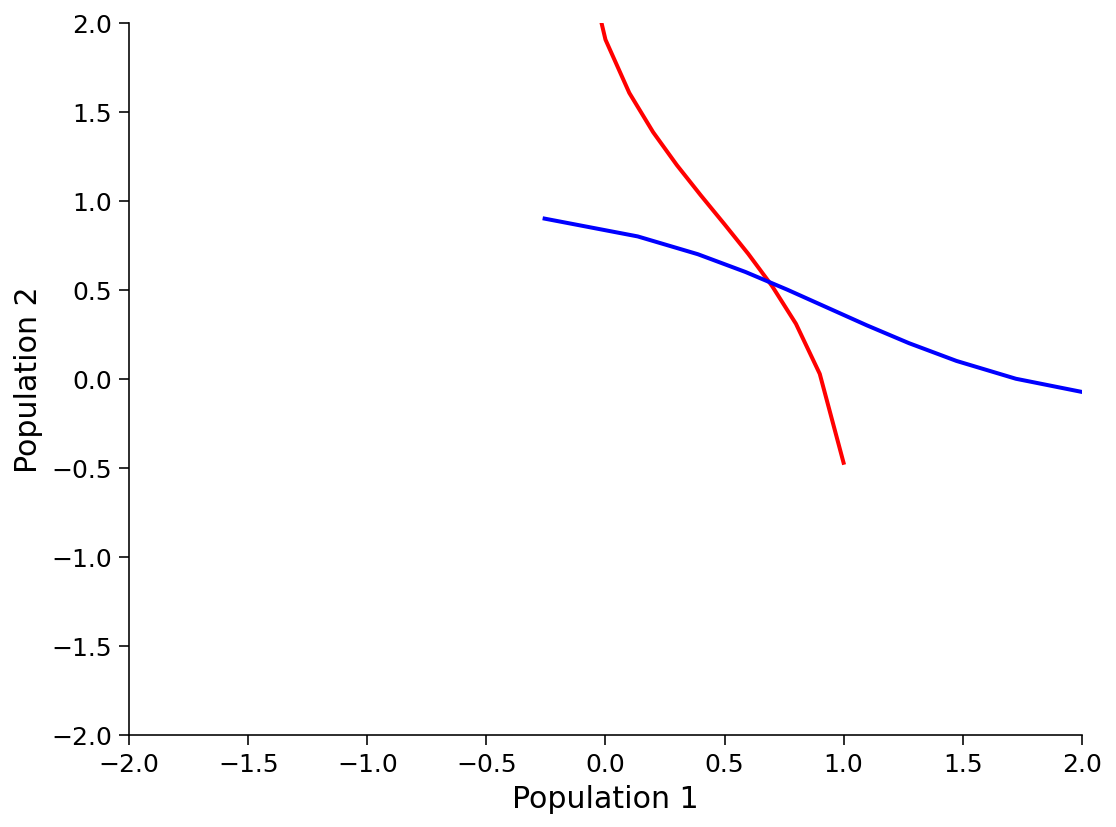

In [13]:
def nullclines2D(h_span, alpha,RI1,RI2,wee, Amax = 1, theta = 1):
  """
  This functions computes the nullclines corresponding to the differential equations system

  Input : 
  -h_span is the set of points on which we want to evaluate the nullclines
  -alpha and wee are parameters of the equations
  -RI1 and RI2: input current (float)
  """

  h2_eq1 = np.zeros_like(h_span)
  h1_eq2 = np.zeros_like(h_span)
  ######################
  ### your code here ###
  ######################
  for k in range(len(h_span)):
    h2_eq1[k] = np.arctanh(2/(Amax*alpha)*(-h_span[k]+(wee-alpha)*geval(h_span[k])+RI1)-1)+theta
    h1_eq2[k] = np.arctanh(2/(Amax*alpha)*(-h_span[k]+(wee-alpha)*geval(h_span[k])+RI2)-1)+theta

  return h2_eq1,h1_eq2



# Run the lines below to test your code 


vec1,vec2 = nullclines2D(np.arange(-2,2,0.1),1,0.8,0.75,1.5)
fig, ax = plt.subplots()
ax.plot(np.arange(-2,2,0.1),vec1,color="red",linewidth=2)
ax.plot(vec2,np.arange(-2,2,0.1),color="blue",linewidth=2)
ax.set_xlabel('Population 1')
ax.set_ylabel('Population 2')
ax.set_xlim([-2 ,2])
ax.set_ylim([-2,2])
plt.show()

**Questions**

* How would you interpret this graph? What do you observe on it?

* Could you make any parallelism with the phase plane analysis? 


## Taking a decision with noisy inputs

**Exercise 4**

Implement a function that generates noisy evidence inputs for the two populations and investigate its effect on the decision making process.


**Modify** the parameter `sigma` to change the noise level, what do you observe? 


*Note* : For this exercise, we modify the tau parameter to highlight the speed-accuracy tradeoff

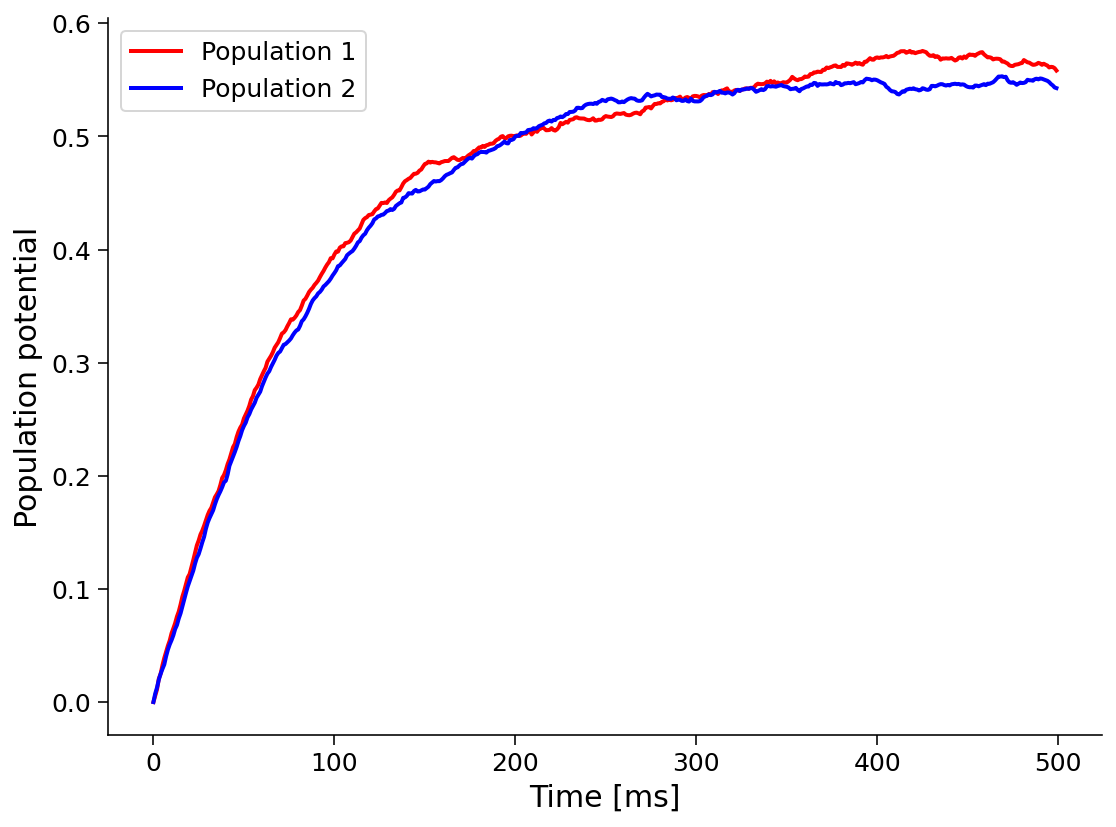

In [30]:
def noisy_input(mean_intensity,noise_level,length):
    """
    This function creates a noisy input evidence for the two populations model
    Inputs : 
    -mean_intensity is the mean input current
    -noise_level is the variance of the noise on the input current
    -length is the time span of the input current
    Outputs : 
    -noisy_input is the resulting noisy input 
    """
    ######################
    ### your code here ###
    ######################
    noisy_input= np.random.normal(loc=mean_intensity, scale=noise_level, size = length)
    
    return noisy_input

#Run the lines below to test your code and investigate the noise effect on the population dynamics
sigma = 0.1
pars['sim_time'] = 0.5
pars['tau'] = 100e-3
h = simulatePopEv(np.vstack((noisy_input(0.7,sigma,500),noisy_input(0.69,sigma,500))),[0,0],pars)

fig, ax = plt.subplots()
ax.plot(range(500),h[0,:],label='Population 1',color='red',linewidth=2)
ax.plot(range(500),h[1,:],label='Population 2',color='blue',linewidth=2)
ax.legend()
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Population potential')
plt.show()

**Questions**

* What potential issue could you see with this kind of input evidence?

* How could you circumvent these isues?

## Speed accuracy tradeoff

When you take decision or perform actions, time is one of the main parameter. In decision making and motor control, it is known to induce *speed-accuracy tradeoff*. Speed-accuracy tradeoff tells that if you increase the speed of a movement or decrease the time to take a decision, you will affect the accuracy in a negative manner. In this exercise, we will investigate how this effect affects our two population model.

**Exercise 5**

Run a few simulations and plot the accuracy in the answers based on the time the subject has to take his decision.

What happens if the input is more noisy, or if the input to the two population is not as clear ? 

[]

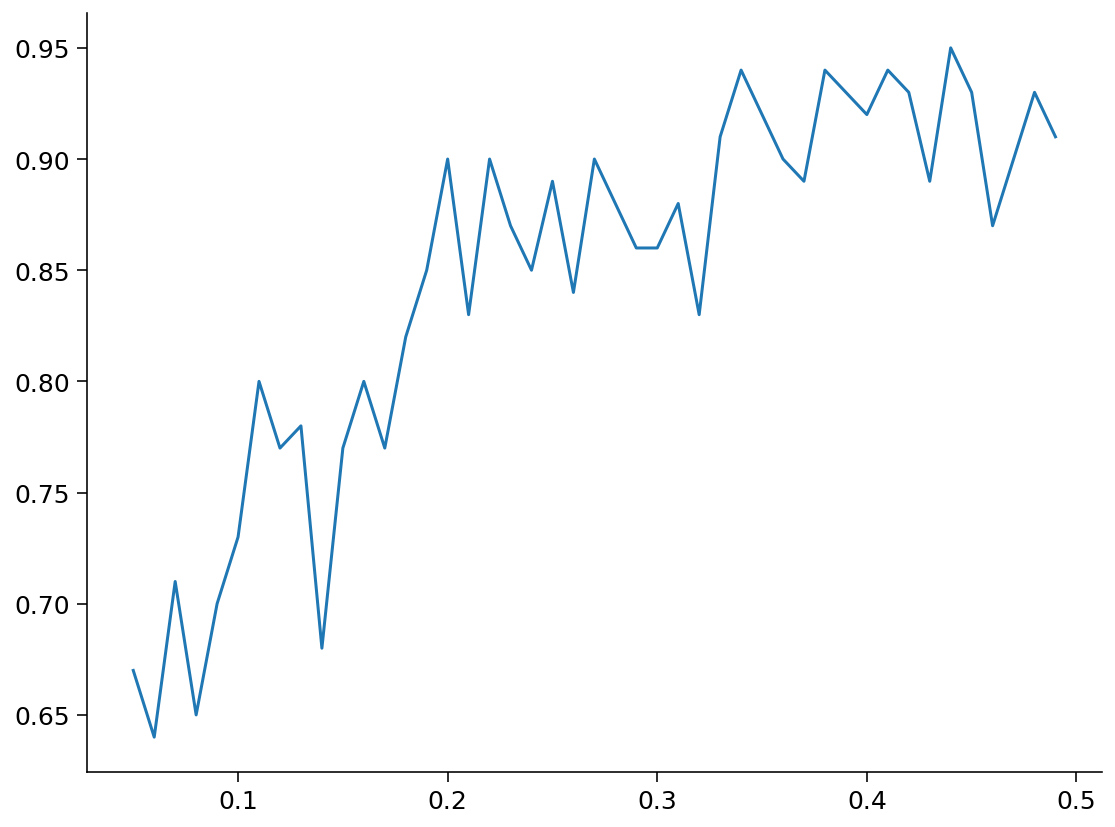

In [32]:
def speed_accuracy_tradeoff(RI1,RI2,h0,time_range,niter):
    """
    This function evaluates the speed accuracy tradeoff for the two populations dynamics
   
    Inputs : 
    -RI (numpy array) contains the input currents
    -h0 initial potential 
    -time_range is the time range we want to evaluate
    -niter is the number of iterations for each time step 

    Outputs:
    -accuracy vector (contains the accuracy for each time)
    """
    accuracy_vector = np.zeros_like(time_range)
  
    idx = 0
    for time in time_range:
        pars['sim_time'] = time
        accuracy=0
        for n in range(niter):
            RI = np.vstack((noisy_input(RI1,sigma,500),(noisy_input(RI2,sigma,500))))
            h = simulatePopEv(RI,h0,pars)
            if np.sum(h[0,:])>np.sum(h[1,:]):
                accuracy +=1
        accuracy_vector[idx] = accuracy/niter
        idx +=1
    return accuracy_vector

# Run the lines below to test your code 
pars = {'sim_time':0.5,'dt':1e-3,'tau':10e-3,'wee':1.5,'alpha':1,'theta':1,'amax': 1}
sigma=0.1
h0 = [0,0]
time_range = np.arange(.05,.5,.01)
accuracy_vector = speed_accuracy_tradeoff(RI1=0.7,RI2=0.69,h0=h0,time_range=time_range,niter=100)
fig,ax = plt.subplots()
ax.plot(time_range,accuracy_vector)
plt.plot()

# Winner takes all or what happens when we have more than two potential outcomes? 

The framework we developped above can be extended to model problems where there are more than two different outcomes at the decision process. In this case, every population will get its own input current $RI_i$ and will inhibit all the other populations. We therefore have the following differential equation for each single population

\begin{eqnarray}
& & \\
\tau \dfrac{dh_k}{dt} = -h_k + w_0 g\left(h_k\right) - \alpha \sum_{j\neq k}g\left(h_j\right) + RI_k
& & \\
\end{eqnarray}

**Question**

* How would you explain each term of these equations?

**Exercise 6**

Implement the winner takes all model by filling the function whose definition is given below



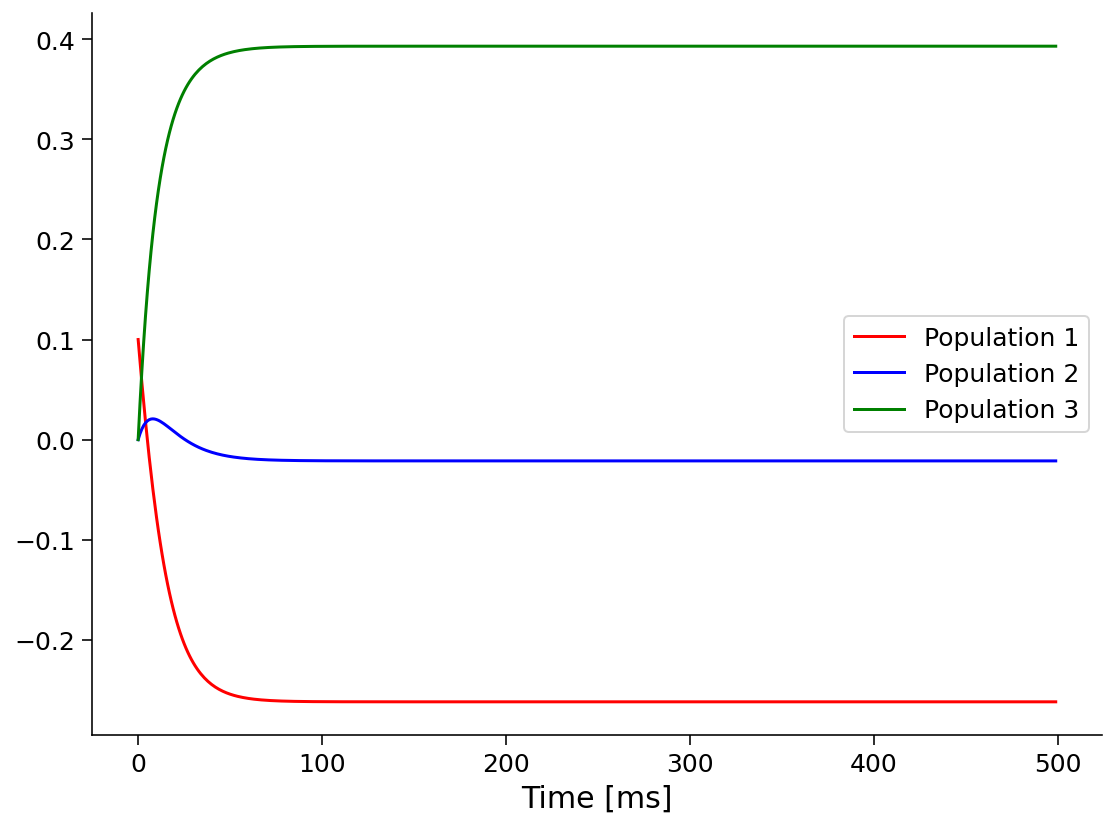

In [33]:
def simulate_wta(h0,RI,sim_time=.500,dt=1e-3,tau=10e-3,we=1,alpha=2):
  """
  This function models the winner takes all mechanism. It models the time-evolution of the different populations potential

  Inputs : 
    h0 is the initial potentials
    sim_time is the number of time steps we want to simulate
    dt is the length of the time step
    tau is the time constant of the system (assumed the same for all populations)
    we is the self excitatory constant
    alpha is the inhibitory constant
  Outputs : 
    h is the time evolution of populations' potentials
  """

  ######################
  ### your code here ###
  ######################
  h = np.zeros((len(h0),int(sim_time/dt)))
  h[:,0]= h0
  for time in range(int(sim_time/dt)-1):
    gH = geval(h[:,time])
    for pop in range(len(h0)):
        h[pop,time+1] = h[pop,time] + dt/tau * (-h[pop,time] + we*gH[pop] - alpha * np.sum(gH[range(len(h0)) != pop]) + RI[pop]) 

  return h

#Run the lines below to test your code 


h0 = [0.1,0,0]
RI = [0.5,0.7,1]
h = simulate_wta(h0,RI)

fig, ax = plt.subplots()
ax.plot(range(500),h[0,:],color="red",label='Population 1')
ax.plot(range(500),h[1,:],color="blue",label='Population 2')
ax.plot(range(500),h[2,:],color="green",label='Population 3')
ax.set_xlabel('Time [ms]')
ax.set_ylabel('')
plt.legend()
plt.show()

**Questions**

Change the values of the initial potentials as well as those of the input current to investigate this process (`h0` and `RI` respectively)

## Visualization of the populations' dynamics

Run the two cells below to explore 3d representation of the populations' dynamics.

The **first** graph represents the vector field, if you want to you can modify the input currents to chagne the shape of the vector field and explore the different potential versions. You can also change the angle of view by modifying the parameters `elev` and `azim` at the second to last line. 



The **second** graph represents slabs of the first one take respectively along the x-, y- and z-axis. Moving the widget will change the selected slab.

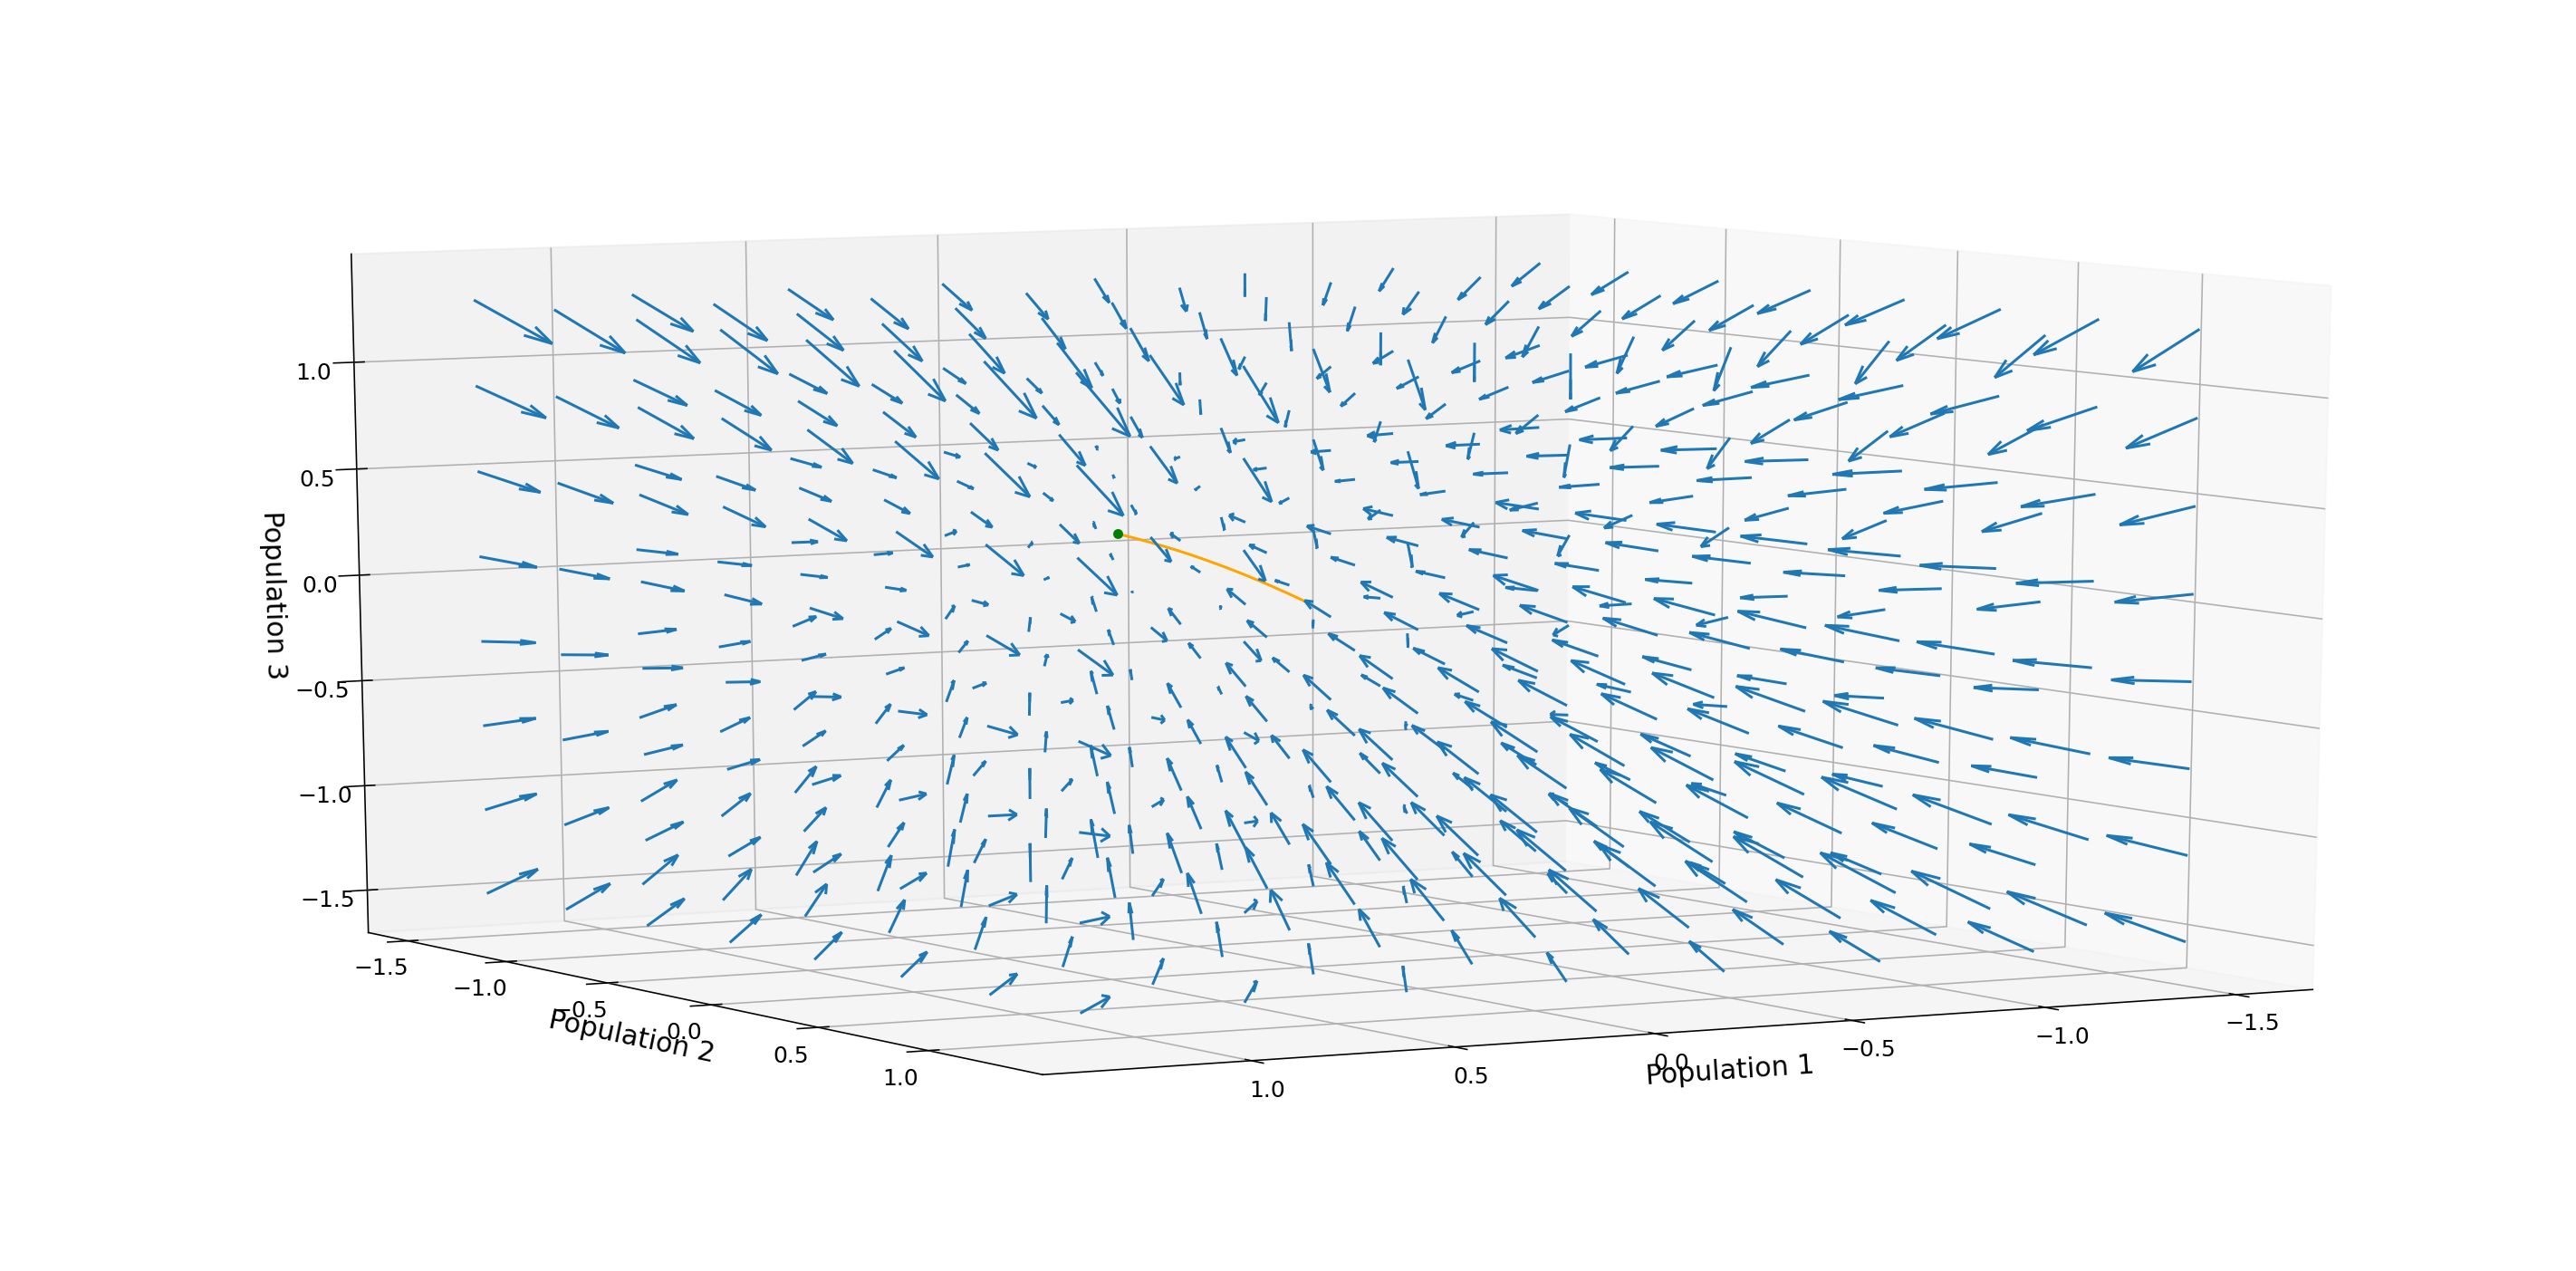

In [34]:
# @title Make sure to execute this cell

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(projection='3d')

x,y,z = np.meshgrid(np.arange(-1.5,1.6,0.4),
                    np.arange(-1.5,1.6,0.4),
                    np.arange(-1.5,1.6,0.4))
u = np.zeros_like(x)
v = np.zeros_like(y)
w = np.zeros_like(z)
for ix in range(len(x)):
  for iy in range(len(y)):
    for iz in range(len(z)):
      h=simulate_wta([x[ix,iy,iz],y[ix,iy,iz], z[ix,iy,iz]],[1,0.5,1],sim_time=0.002)
      u[ix,iy,iz] = h[0,-1]
      v[ix,iy,iz] = h[1,-1]
      w[ix,iy,iz] = h[2,-1]
ax.quiver(x,y,z,u-x,v-y,w-z,length=1,normalize=False)
ax.set_xlabel('Population 1')
ax.set_ylabel('Population 2')
ax.set_zlabel('Population 3')


pos_init1 = [0,0,0]
h = simulate_wta(pos_init1,[1,0.5,1])
ax.plot(h[0,:],h[1,:],h[2,:],color="orange")
ax.scatter(h[0,-1],h[1,-1],h[2,-1],color="green",marker='o')
ax.view_init(elev=10., azim=60)
plt.show()

In [35]:
# @title Widget to show the 2D evolution of the different slabs
# (i'm starting to turn crazy)
my_layout.width='450px'
@widgets.interact(
    xslab=widgets.FloatSlider(0,min=-1.5,max=1.5,step=0.1,layout=my_layout),
    yslab=widgets.FloatSlider(0,min=-1.5,max=1.5,step=0.1,layout=my_layout),
    zslab=widgets.FloatSlider(0,min=-1.5,max=1.5,step=0.1,layout=my_layout)
)

def slab_rpz(xslab=0,yslab=0,zslab=0):

  y_xslab,z_xslab = np.meshgrid(np.arange(-1.5,1.6,0.4),
                                np.arange(-1.5,1.6,0.4))
  x_yslab,z_yslab = np.meshgrid(np.arange(-1.5,1.6,0.4),
                                np.arange(-1.5,1.6,0.4))
  x_zslab,y_zslab = np.meshgrid(np.arange(-1.5,1.6,0.4),
                                np.arange(-1.5,1.6,0.4))
  
  v_yz = np.zeros_like(y_xslab)
  w_yz = np.zeros_like(z_xslab)

  u_xz = np.zeros_like(x_yslab)
  w_xz = np.zeros_like(z_yslab)

  u_xy = np.zeros_like(x_zslab)
  v_xy = np.zeros_like(y_zslab)

  for i_row in range(len(y_xslab)):
    for i_col in range(len(y_xslab)):
      h_yz = simulate_wta([xslab,y_xslab[i_row,i_col],z_xslab[i_row,i_col]],[1,0.5,1],sim_time=0.002)
      h_xz = simulate_wta([x_yslab[i_row,i_col],yslab,z_yslab[i_row,i_col]],[1,0.5,1],sim_time=0.002)
      h_xy = simulate_wta([x_zslab[i_row,i_col],y_zslab[i_row,i_col],zslab],[1,0.5,1],sim_time=0.002)
      v_yz[i_row,i_col] = h_yz[0,-1]
      w_yz[i_row,i_col] = h_yz[1,-1]
      
      u_xz[i_row,i_col] = h_xz[0,-1]
      w_xz[i_row,i_col] = h_xz[1,-1]

      u_xy[i_row,i_col] = h_xy[0,-1]
      v_xy[i_row,i_col] = h_xy[1,-1]
  
  fig, ax = plt.subplots(1,3)
  ax[0].quiver(y_xslab,z_xslab,v_yz-y_xslab,w_yz-z_xslab)

  ax[1].quiver(x_yslab,z_yslab,u_xz-x_yslab,w_xz-z_yslab)

  ax[2].quiver(x_zslab,y_zslab,u_xy-x_zslab,v_xy-y_zslab)





interactive(children=(FloatSlider(value=0.0, description='xslab', layout=Layout(width='450px'), max=1.5, min=-…

## Conclusive questions

* What is the link between this third exercise session and the first two ones? 
* What are the drawbacks of these methods to model decision making?